In [62]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import ccxt
import time

In [ ]:
def download_and_plot(cryptos, timeframe, start_date, end_date, plot):
    # Controllo degli input
    if len(cryptos) != 2:
        raise ValueError("La lista delle crypto deve contenere esattamente due simboli.")
    
    exchange = ccxt.binance()  # Usa Binance come exchange
    exchange.load_markets()  # Carica i mercati disponibili
    cryptos_pairs = [f"{crypto}/USDT" for crypto in cryptos]  # Adatta i simboli per Binance

    # Converti date in timestamp
    start_timestamp = int(pd.Timestamp(start_date).timestamp() * 1000)
    end_timestamp = int(pd.Timestamp(end_date).timestamp() * 1000)

    data_frames = {}

    for pair in cryptos_pairs:
        if pair not in exchange.markets:
            raise ValueError(f"Il mercato {pair} non è disponibile su Binance.")

        print(f"Scarico i dati per {pair} dal {start_date} al {end_date}...")
        
        ohlcv = []
        since = start_timestamp

        # Scarica i dati in blocchi fino a raggiungere la data di fine
        while since < end_timestamp:
            batch = exchange.fetch_ohlcv(pair, timeframe, since)
            if not batch:
                break
            ohlcv.extend(batch)
            since = batch[-1][0] + 1  # Avanza al prossimo blocco
            time.sleep(exchange.rateLimit / 1000)  # Rispetta il rate limit dell'API

        # Crea un DataFrame dai dati
        df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
        df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
        df.set_index('timestamp', inplace=True)

        # Filtra i dati oltre la data di fine
        df = df[df.index <= pd.Timestamp(end_date)]
        data_frames[pair] = df

    # Associa le due crypto a variabili più leggibili
    crypto1_df = data_frames[cryptos_pairs[0]]
    crypto2_df = data_frames[cryptos_pairs[1]]
    display(crypto1_df)
    display(crypto2_df)

    # Calcola il rapporto tra i prezzi di chiusura delle due crypto
    ratio = crypto2_df['close'] / crypto1_df['close']


    if plot:
        # Plot dei dati
        plt.figure(figsize=(14, 8))

        # Grafico della prima crypto
        plt.subplot(3, 1, 1)
        plt.plot(crypto1_df.index, crypto1_df['close'], label=f"{cryptos[0]} Price")
        plt.title(f"{cryptos[0]} Price")
        plt.ylabel('Price (USDT)')
        plt.grid()
        plt.legend()

        # Grafico della seconda crypto
        plt.subplot(3, 1, 2)
        plt.plot(crypto2_df.index, crypto2_df['close'], label=f"{cryptos[1]} Price", color='orange')
        plt.title(f"{cryptos[1]} Price")
        plt.ylabel('Price (USDT)')
        plt.grid()
        plt.legend()

        # Grafico del rapporto
        plt.subplot(3, 1, 3)
        plt.plot(crypto1_df.index, ratio, label=f"{cryptos[1]}/{cryptos[0]} Ratio", color='green')
        plt.title(f"{cryptos[1]} / {cryptos[0]} Price Ratio")
        plt.ylabel('Ratio')
        plt.grid()
        plt.legend()

        plt.tight_layout()
        plt.show()

    return crypto1_df, crypto2_df

Scarico i dati per BTC/USDT da 2021-01-01 a 2021-12-31...
Scarico i dati per ETH/USDT da 2021-01-01 a 2021-12-31...


,open,high,low,close,volume
timestamp,,,,,
2021-01-01,28923.63,29600.00,28624.57,29331.69,54182.925011
2021-01-02,29331.70,33300.00,28946.53,32178.33,129993.873362
2021-01-03,32176.45,34778.11,31962.99,33000.05,120957.566750
2021-01-04,33000.05,33600.00,28130.00,31988.71,140899.885690
2021-01-05,31989.75,34360.00,29900.00,33949.53,116049.997038
...,...,...,...,...,...
2021-12-27,50775.48,52088.00,50449.00,50701.44,28792.215660
2021-12-28,50701.44,50704.05,47313.01,47543.74,45853.339240
2021-12-29,47543.74,48139.08,46096.99,46464.66,39498.870000


,open,high,low,close,volume
timestamp,,,,,
2021-01-01,736.42,749.00,714.29,728.91,6.751141e+05
2021-01-02,728.91,787.69,714.91,774.56,1.352619e+06
2021-01-03,774.44,1011.07,768.71,978.28,2.813604e+06
2021-01-04,978.33,1162.97,890.00,1041.43,4.245011e+06
2021-01-05,1041.45,1134.60,974.45,1099.56,2.706996e+06
...,...,...,...,...,...
2021-12-27,4063.57,4127.46,4031.00,4037.23,2.222254e+05
2021-12-28,4037.22,4037.23,3759.36,3792.75,3.580647e+05
2021-12-29,3792.75,3827.78,3604.20,3630.19,3.027536e+05


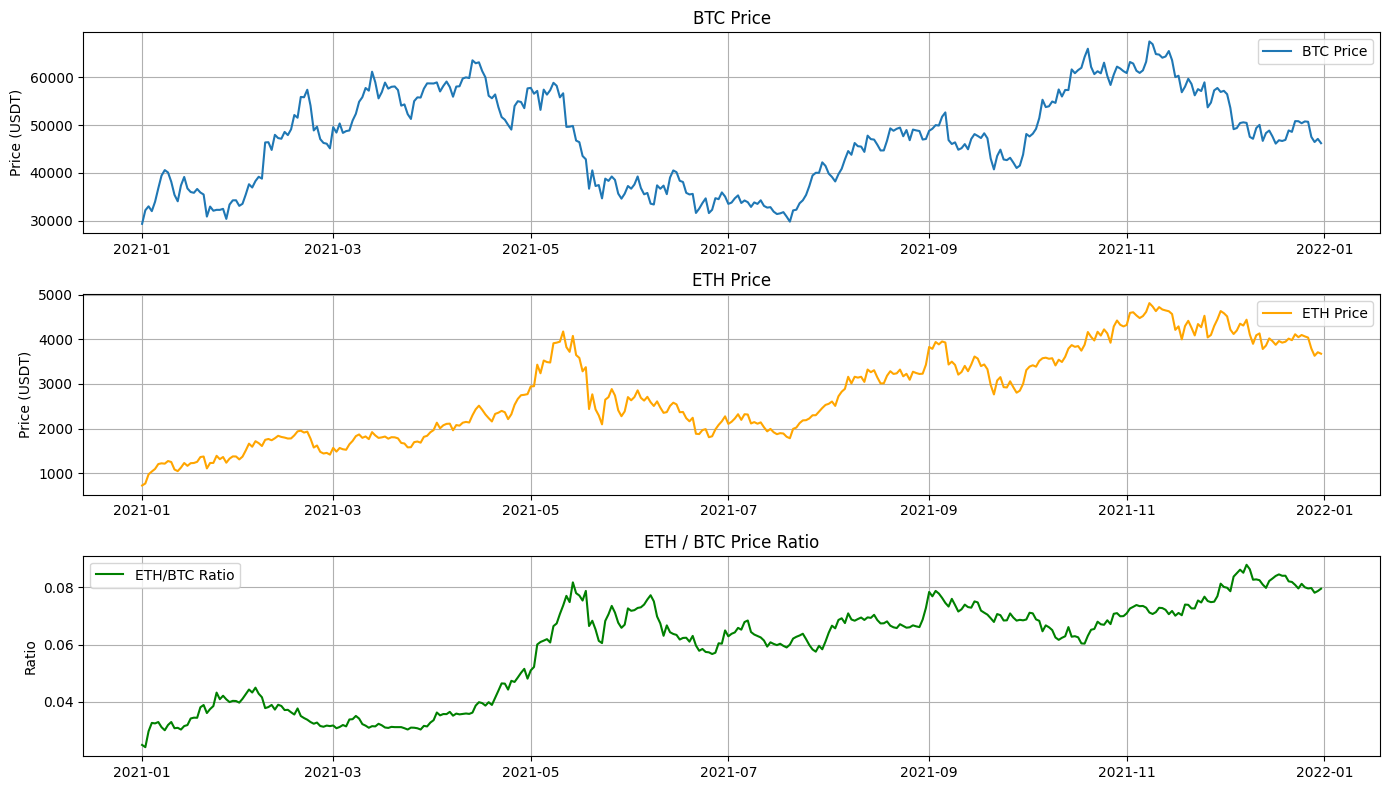

In [66]:
# Esempio di utilizzo
cryptos = ['BTC', 'ETH']  # Specifica le due crypto
timeframe = '1d'  # Specifica il timeframe ('1m', '5m', '1h', '1d', etc.)
start_date = '2021-01-01'  # Data di inizio
end_date = '2021-12-31'  # Data di fine
plot = True

crypto1_df, crypto2_df = download_and_plot(cryptos, timeframe, start_date, end_date, plot)

### Calcolo meccanico delle azioni migliori da compiere date 2 liste di prezzi

In [67]:
# def simulate_all_actions(prices1, prices2, liquidita_iniziale, token1_iniziali, token2_iniziali):
#     """
#     Simula tutte le possibili sequenze di azioni per massimizzare il portafoglio finale.
    
#     Parameters:
#         prices1 (list): Prezzi della crypto 1.
#         prices2 (list): Prezzi della crypto 2.
#         liquidita_iniziale (float): Liquidità iniziale in euro.
#         token1_iniziali (float): Token iniziali della crypto 1.
#         token2_iniziali (float): Token iniziali della crypto 2.
    
#     Returns:
#         dict: Migliore sequenza di azioni con ordine, portafoglio massimo e eventi ottimali.
#     """
#     n = len(prices1)
#     actions = ["hold", "buy", "sell"]  # Azioni possibili: compra, vendi, tieni
#     max_portafoglio = 0
#     best_sequence = []  # Sequenza ottimale
#     best_events = []  # Per grafici

#     # Genera tutte le combinazioni di azioni e ordini
#     all_action_combinations = list(itertools.product(actions, repeat=2))  # Azioni per 2 crypto ogni giorno
#     all_orders = list(itertools.product([("1", "2"), ("2", "1")], repeat=n))  # Ordine delle azioni giornaliere

#     for order in all_orders:
#         for sequence in itertools.product(all_action_combinations, repeat=n):
#             liquidita = liquidita_iniziale
#             token1 = token1_iniziali
#             token2 = token2_iniziali
#             events = []  # Traccia gli eventi (per grafico)
#             valid_sequence = []

#             for day in range(n):
#                 # Azioni per il giorno corrente
#                 action1, action2 = sequence[day]
#                 day_order = order[day]

#                 # Esegui le azioni nell'ordine specificato
#                 actions_performed = []  # Per tracciare l'ordine effettivo di esecuzione
#                 for crypto in day_order:
#                     if crypto == "1":
#                         if action1 == "buy" and liquidita > 0:
#                             # Compra la crypto 1
#                             token1 += liquidita / prices1[day]
#                             events.append(("buy", day, 1))
#                             liquidita = 0
#                             actions_performed.append("buy 1")
#                         elif action1 == "sell" and token1 > 0:
#                             # Vendi la crypto 1
#                             liquidita += token1 * prices1[day]
#                             events.append(("sell", day, 1))
#                             token1 = 0
#                             actions_performed.append("sell 1")
#                         elif action1 == "hold":
#                             actions_performed.append("hold 1")
#                     elif crypto == "2":
#                         if action2 == "buy" and liquidita > 0:
#                             # Compra la crypto 2
#                             token2 += liquidita / prices2[day]
#                             events.append(("buy", day, 2))
#                             liquidita = 0
#                             actions_performed.append("buy 2")
#                         elif action2 == "sell" and token2 > 0:
#                             # Vendi la crypto 2
#                             liquidita += token2 * prices2[day]
#                             events.append(("sell", day, 2))
#                             token2 = 0
#                             actions_performed.append("sell 2")
#                         elif action2 == "hold":
#                             actions_performed.append("hold 2")

#                 # Calcola il portafoglio totale alla fine del giorno
#                 portafoglio_giornaliero = liquidita + token1 * prices1[day] + token2 * prices2[day]
#                 valid_sequence.append(f"Giorno {day}: {', '.join(actions_performed)} (Portafoglio: {portafoglio_giornaliero:.2f})")

#             # Calcola il portafoglio totale alla fine
#             portafoglio_totale = liquidita + token1 * prices1[-1] + token2 * prices2[-1]
#             if portafoglio_totale > max_portafoglio:
#                 max_portafoglio = portafoglio_totale
#                 best_sequence = valid_sequence
#                 best_events = events

#     # Grafico dei prezzi con eventi di acquisto e vendita
#     fig, ax = plt.subplots(2, 1, figsize=(12, 8))
#     days = list(range(n))

#     # Elementi della legenda (unici per evitare ripetizioni)
#     buy_marker = plt.Line2D([0], [0], color="green", marker="^", linestyle="None", markersize=10, label="Buy")
#     sell_marker = plt.Line2D([0], [0], color="red", marker="v", linestyle="None", markersize=10, label="Sell")

#     # Crypto 1
#     ax[0].plot(days, prices1, label="Crypto 1", color="blue")
#     for event in best_events:
#         if event[0] == "buy" and event[2] == 1:
#             ax[0].scatter(event[1], prices1[event[1]], color="green", marker="^", s=100)
#         elif event[0] == "sell" and event[2] == 1:
#             ax[0].scatter(event[1], prices1[event[1]], color="red", marker="v", s=100)
#     ax[0].set_title("Prezzi Crypto 1")
#     ax[0].set_xlabel("Giorno")
#     ax[0].set_ylabel("Prezzo")
#     ax[0].grid()
#     ax[0].legend(handles=[buy_marker, sell_marker])

#     # Crypto 2
#     ax[1].plot(days, prices2, label="Crypto 2", color="orange")
#     for event in best_events:
#         if event[0] == "buy" and event[2] == 2:
#             ax[1].scatter(event[1], prices2[event[1]], color="green", marker="^", s=100)
#         elif event[0] == "sell" and event[2] == 2:
#             ax[1].scatter(event[1], prices2[event[1]], color="red", marker="v", s=100)
#     ax[1].set_title("Prezzi Crypto 2")
#     ax[1].set_xlabel("Giorno")
#     ax[1].set_ylabel("Prezzo")
#     ax[1].grid()
#     ax[1].legend(handles=[buy_marker, sell_marker])

#     plt.tight_layout()
#     plt.show()


#     return {
#         "best_sequence": best_sequence,
#         "max_portafoglio": max_portafoglio,
#     }

In [68]:
# prices_crypto1 = [4, 2, 3, 12, 20, 6]
# prices_crypto2 = [8, 12, 10, 15, 20, 10]
# liquidita_iniziale = 1000
# token1_iniziali = 0
# token2_iniziali = 0

# result = simulate_all_actions(prices_crypto1, prices_crypto2, liquidita_iniziale, token1_iniziali, token2_iniziali)

# print("Migliore sequenza di azioni:")
# for azione in result["best_sequence"]:
#     print(azione)
# print(f"Portafoglio massimo: {result['max_portafoglio']}")

### Calcolo rendimento ideale per 2 crypto

In [69]:
def calcola_rendimento_ideale_doppio_asset(prices1, prices2, liquidita_iniziale, token1_iniziali, token2_iniziali):
    """
    Calcola il massimo fattore di rendimento ottenibile con due asset dati i loro prezzi futuri e gli stati iniziali.
    
    Parameters:
        prices1 (list): Lista dei prezzi della crypto 1.
        prices2 (list): Lista dei prezzi della crypto 2.
        liquidita_iniziale (float): Quantità di liquidità iniziale in euro.
        token1_iniziali (float): Numero iniziale di token della crypto 1.
        token2_iniziali (float): Numero iniziale di token della crypto 2.
    
    Returns:
        float: Massimo fattore di rendimento ottenibile.
    """
    def is_end_of_drop(prices, t):
        """Verifica se il giorno t è la fine di una discesa."""
        if t == 0:
            return prices[t] < prices[t + 1]
        elif t == len(prices) - 1:
            return prices[t] < prices[t - 1]
        return prices[t] < prices[t - 1] and prices[t] < prices[t + 1]

    def is_end_of_rise(prices, t):
        """Verifica se il giorno t è la fine di una salita."""
        if t == 0:
            return prices[t] > prices[t + 1]
        elif t == len(prices) - 1:
            return prices[t] > prices[t - 1]
        return prices[t] > prices[t - 1] and prices[t] > prices[t + 1]

    def calculate_partial_return(prices, t0, G):
        """Calcola il rendimento parziale da t0 a G."""
        partial_return = 1
        i = t0
        while i < G:
            if prices[i] < prices[i + 1]:  # Inizio di una salita
                start = i
                while i + 1 <= G and prices[i] < prices[i + 1]:  # Continua nella salita
                    i += 1
                end = i
                partial_return *= prices[end] / prices[start]
            else:
                i += 1
        return partial_return

    n = len(prices1)
    liquidita = liquidita_iniziale  # Quantità di liquidità corrente
    token1 = token1_iniziali  # Numero di token della crypto 1 posseduti
    token2 = token2_iniziali  # Numero di token della crypto 2 posseduti
    # last_purchase_price = None  # Prezzo di acquisto più recente della crypto posseduta

    for t in range(n):
        # Controllo se vendere alla fine di una salita (inoltre faccio questo controllo per primo, e poi acquisto eventualmente dopo, perchè l'ordine conta)
        if token1 > 0 and is_end_of_rise(prices1, t):
            liquidita += token1 * prices1[t]
            token1 = 0
        if token2 > 0 and is_end_of_rise(prices2, t):
            liquidita += token2 * prices2[t]
            token2 = 0

        # Controlla se acquistare alla fine di una discesa
        if is_end_of_drop(prices1, t) or is_end_of_drop(prices2, t):
            if is_end_of_drop(prices1, t) and not is_end_of_drop(prices2, t):
                if liquidita > 0:
                    token1 = liquidita / prices1[t]
                    liquidita = 0
            elif is_end_of_drop(prices2, t) and not is_end_of_drop(prices1, t):
                if liquidita > 0:
                    token2 = liquidita / prices2[t]
                    liquidita = 0
            elif is_end_of_drop(prices1, t) and is_end_of_drop(prices2, t):
                # Entrambe alla fine di una discesa: calcola rendimento parziale
                G1 = next((i for i in range(t + 1, n) if is_end_of_rise(prices1, i)), t)
                G2 = next((i for i in range(t + 1, n) if is_end_of_rise(prices2, i)), t)
                G = max(G1, G2)

                R1_partial = calculate_partial_return(prices1, t, G)
                R2_partial = calculate_partial_return(prices2, t, G)

                if R1_partial > R2_partial and liquidita > 0:
                    token1 = liquidita / prices1[t]
                    liquidita = 0
                elif R2_partial >= R1_partial and liquidita > 0:
                    token2 = liquidita / prices2[t]
                    liquidita = 0

    # Se alla fine stiamo ancora detenendo qualcosa, vendiamo
    if token1 > 0:
        liquidita += token1 * prices1[-1]
    if token2 > 0:
        liquidita += token2 * prices2[-1]
    
    return liquidita / liquidita_iniziale  # Ritorna il fattore di rendimento totale

In [70]:
prices_crypto1 = crypto1_df['close'] #[1, 4, 2, 20]
prices_crypto2 = crypto2_df['close'] #[10, 8, 6, 20]
liquidita_iniziale = 1000
token1_iniziali = 0
token2_iniziali = 0

rendimento = calcola_rendimento_ideale_doppio_asset(
    prices_crypto1, prices_crypto2, liquidita_iniziale, token1_iniziali, token2_iniziali
)
print(f"Fattore di rendimento massimo ottenibile: {rendimento}")

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_72036\3777842782.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return prices[t] < prices[t + 1]
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_72036\3777842782.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return prices[t] > prices[t - 1] and prices[t] > prices[t + 1]
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_72036\3777842782.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `

Fattore di rendimento massimo ottenibile: 6705.673003424758


In [71]:
def calcola_rendimento_portafoglio_ideale(capitale_iniziale, bitcoin_iniziali, lista_prezzi, min_acquisto, min_vendita, perc_commissione_acquisto, perc_commissione_vendita):
    capitale = capitale_iniziale
    bitcoin = bitcoin_iniziali
    comprato = False

    for i in range(len(lista_prezzi) - 1):
        # Compra al minimo
        if lista_prezzi[i] < lista_prezzi[i + 1] and not comprato and capitale >= min_acquisto:
            bitcoin_acquistati = (capitale * (1 - perc_commissione_acquisto)) / lista_prezzi[i]
            bitcoin += bitcoin_acquistati
            capitale = 0
            comprato = True
            # print(f'Bitcoin posseduti: {bitcoin}')
        # Vende al massimo
        elif lista_prezzi[i] > lista_prezzi[i + 1] and comprato and bitcoin * lista_prezzi[i] >= min_vendita:
            capitale_vendita = bitcoin * lista_prezzi[i] * (1 - perc_commissione_vendita)
            capitale += capitale_vendita
            bitcoin = 0
            comprato = False
            # print(f'Capitale posseduto: {capitale}')

    # Vende i bitcoin rimasti all'ultimo prezzo
    if comprato and bitcoin * lista_prezzi.iloc[-1] >= min_vendita:
        capitale += bitcoin * lista_prezzi.iloc[-1] * (1 - perc_commissione_vendita)
        bitcoin = 0
        # print(f'Capitale posseduto: {capitale}')
        # print(f'Bitcoin posseduti: {bitcoin}')

    valore_iniziale = capitale_iniziale + bitcoin_iniziali * lista_prezzi[0]
    valore_finale = capitale + bitcoin * lista_prezzi.iloc[-1]

    rendimento = valore_finale / valore_iniziale

    return [rendimento, valore_finale]

In [76]:
liquidità_iniziale = 1000
bitcoin_iniziali = 0

rendimento_ideale, portafoglio_finale_ideale = calcola_rendimento_portafoglio_ideale(liquidità_iniziale, bitcoin_iniziali, crypto1_df['close'], 0, 0, 0, 0)
print('Rendimento ideale:', round(rendimento_ideale, 2))
print('Portafoglio finale ideale in euro:', round(portafoglio_finale_ideale, 2))

Rendimento ideale: 385.39
Portafoglio finale ideale in euro: 385390.81


C:\Users\Alessandro\AppData\Local\Temp\ipykernel_72036\398043689.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if lista_prezzi[i] < lista_prezzi[i + 1] and not comprato and capitale >= min_acquisto:
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_72036\398043689.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bitcoin_acquistati = (capitale * (1 - perc_commissione_acquisto)) / lista_prezzi[i]
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_72036\398043689.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (co